LOAN STATUS

* *PROJECT 6*

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [34]:
loan_dataset = pd.read_csv('Loan.csv')

In [35]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [36]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
loan_dataset.shape

(614, 13)

In [38]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [39]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
#droppinh the missing values
loan_dataset = loan_dataset.dropna()

In [41]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

*Label Encoding*
* *0 - No*
* *1 - Yes*

In [42]:
loan_dataset.shape

(480, 13)

In [43]:
loan_dataset.replace({"Loan_Status":{"N":0, "Y":1}},inplace=True)

C:\Users\arrma\AppData\Local\Temp\ipykernel_6820\3704297294.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{"N":0, "Y":1}},inplace=True)


In [44]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [45]:
#dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [46]:
#replacing 3+ => 4
loan_dataset = loan_dataset.replace(to_replace= '3+', value=4)

In [47]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

*Data Visualization*

<Axes: xlabel='Education', ylabel='count'>

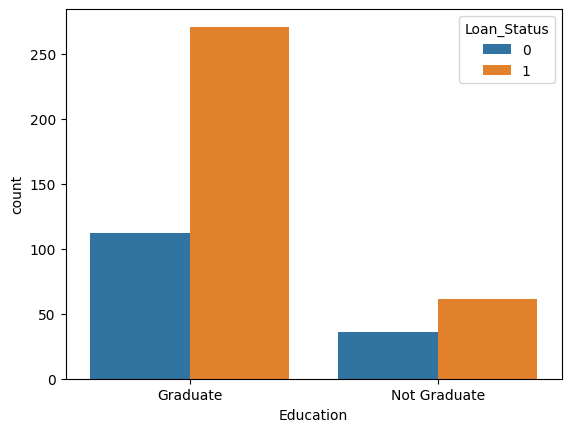

In [48]:
#education & loan status
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Self_Employed', ylabel='count'>

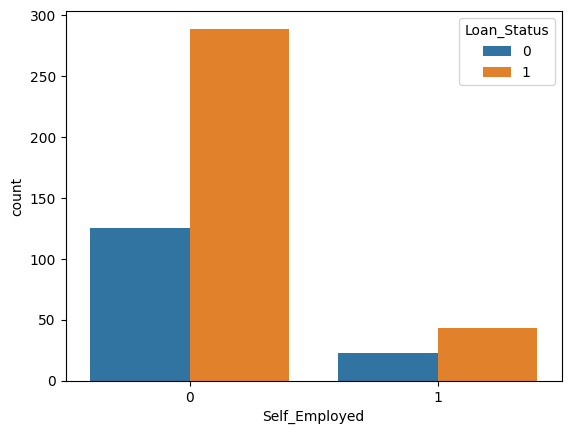

In [65]:
#Self_Employed & Loan status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Property_Area', ylabel='count'>

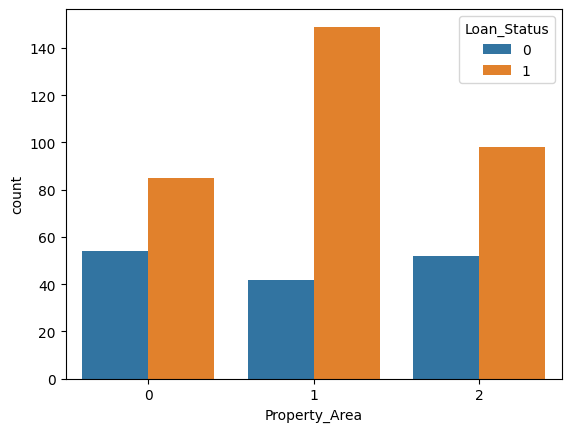

In [66]:
#Property_Area & Loan status
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_dataset)

<Axes: xlabel='Property_Area', ylabel='count'>

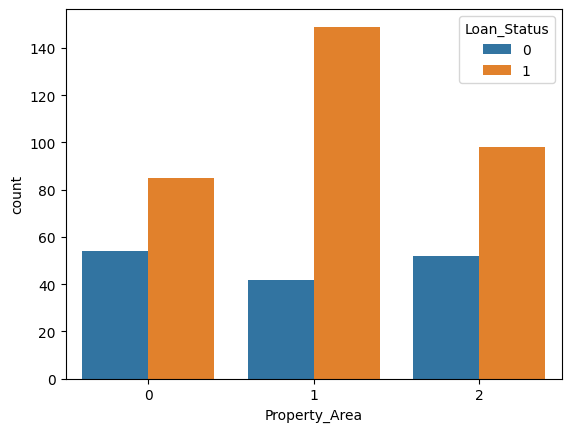

In [ ]:
#Property_Area & Loan status
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_dataset)

In [50]:
#convert categorical columns to numerical values
loan_dataset.replace(
    {'Married': {'No': 0, 'Yes': 1},
     'Gender': {'Male': 1, 'Female': 0},
     'Self_Employed': {'No': 0, 'Yes': 1},
     'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
     'Education': {'Graduate': 1, 'Not Graduate': 0}},
    inplace=True
)

C:\Users\arrma\AppData\Local\Temp\ipykernel_6820\886190599.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace(


In [51]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1) #since "Loan_ID" is not in use
Y = loan_dataset['Loan_Status']

In [53]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [54]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


*Train Test Split*

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [56]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


*Training The Model:*
* *Support Vector Machine Model*


In [57]:
classifier = svm.SVC(kernel='linear')

In [58]:
#training the SVM Model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

*Model Evaluation*

In [59]:
#accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [60]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7986111111111112


In [61]:
#accuracy score on testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [62]:
print('Accuracy on training data : ', testing_data_accuracy)

Accuracy on training data :  0.8333333333333334


*Predictive System*